<a href="https://colab.research.google.com/github/xanasa14/Word2Vec/blob/master/WordEmbeddingTechnicques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing
from gensim.models import Word2Vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/drive/My Drive/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df['Maker_Model']= df['Make']+ " " + df['Model']


INFO - 18:09:20: NumExpr defaulting to 2 threads.


In [4]:
# Select features from original dataset to form a new dataframe 
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1) 
# Store them in the pandas dataframe
df_clean = pd.DataFrame({'clean': df2}) 
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]
# show the example of list of list format of the custom corpus for gensim modeling 
sent[:2]


[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

In [5]:
## Train the genisim word2vec model with our own custom corpus
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

WARNING - 18:10:51: consider setting layer size to a multiple of 4 for greater performance
INFO - 18:10:51: collecting all words and their counts
INFO - 18:10:51: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 18:10:51: PROGRESS: at sentence #10000, processed 74060 words, keeping 841 word types
INFO - 18:10:51: collected 977 word types from a corpus of 88129 raw words and 11914 sentences
INFO - 18:10:51: Loading a fresh vocabulary
INFO - 18:10:51: effective_min_count=1 retains 977 unique words (100% of original 977, drops 0)
INFO - 18:10:51: effective_min_count=1 leaves 88129 word corpus (100% of original 88129, drops 0)
INFO - 18:10:51: deleting the raw counts dictionary of 977 items
INFO - 18:10:51: sample=0.001 downsamples 35 most-common words
INFO - 18:10:51: downsampling leaves estimated 29996 word corpus (34.0% of prior 88129)
INFO - 18:10:51: estimated required memory for 977 words and 50 dimensions: 879300 bytes
INFO - 18:10:51: resetting layer weights

In [6]:
## We can obtain the word embedding directly from the training model
model['Toyota Camry']

array([-0.13439547,  0.08575553, -0.01532825,  0.07142699, -0.07195324,
       -0.07214816,  0.08269129,  0.08128474, -0.08601785,  0.23465951,
        0.03897788,  0.15327561,  0.08458035,  0.04650142,  0.07964969,
       -0.1721467 ,  0.21810229,  0.1728444 ,  0.12142037, -0.08902641,
        0.07515758, -0.28660145, -0.13373317,  0.11967   , -0.08021045,
        0.01095543, -0.35724244,  0.05505908,  0.07388828,  0.10590976,
        0.05928633,  0.02623783,  0.05972757,  0.00545741,  0.03543909,
       -0.11148624, -0.06895357, -0.04056531,  0.03862485,  0.13313933,
        0.14928861,  0.30254745,  0.13608892,  0.295677  ,  0.07329377,
        0.02284901, -0.20518747, -0.02098902,  0.13073565, -0.07922933],
      dtype=float32)

In [7]:
model.similarity('Porsche 718 Cayman', 'Nissan Van')


0.8726467

In [8]:
model.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')


0.9339539

In [10]:
## Show the most similar vehicles for Mercedes-Benz SLK-Class : Default by eculidean distance 
model.most_similar('Mercedes-Benz SLK-Class')[:5]

INFO - 18:11:57: precomputing L2-norms of word weight vectors


[('Lamborghini Murcielago', 0.9956305623054504),
 ('Maserati Spyder', 0.9943025708198547),
 ('Rolls-Royce Ghost', 0.9936675429344177),
 ('Ferrari 456M', 0.9936456680297852),
 ('Mercedes-Benz SLS AMG GT', 0.9935657978057861)]

In [11]:
## Show the most similar vehicles for Toyota Camry : Default by eculidean distance 
model.most_similar('Toyota Camry')[:5]

[('Oldsmobile Cutlass Ciera', 0.9937982559204102),
 ('Toyota Avalon Hybrid', 0.9924304485321045),
 ('Pontiac Grand Am', 0.9922949075698853),
 ('Chevrolet Malibu', 0.9914178252220154),
 ('Oldsmobile LSS', 0.9905810356140137)]

In [0]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [13]:
Maker_Model = list(df.Maker_Model.unique()) ## only get the unique Maker_Model_Year
## Show the most similar Mercedes-Benz SLK-Class by cosine distance 
cosine_distance (model,'Mercedes-Benz SLK-Class',Maker_Model,5)

[('Lamborghini Murcielago', 0.99563056),
 ('Maserati Spyder', 0.9943025),
 ('Rolls-Royce Ghost', 0.99366754),
 ('Ferrari 456M', 0.99364567),
 ('Mercedes-Benz SLS AMG GT', 0.993566)]

In [0]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

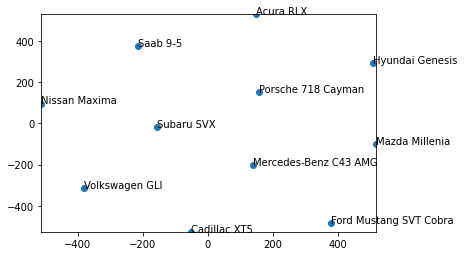

In [15]:
display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman', 50)
